In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
img = cv2.cvtColor(cv2.imread('region_filling.tif'), cv2.COLOR_BGR2GRAY)

In [13]:
def pad_image(img, pad):
    h, w = img.shape 
    padded_image = np.zeros((h + 2 * pad, w + 2 * pad), np.uint8)
    padded_image[pad : pad + h, pad : pad + w] = img

    return padded_image



In [32]:
def edge_detection(img, x_kernel, y_kernel, padded_imaage):
    pad = x_kernel.shape[0] // 2

    G_x = np.zeros_like(img, np.float64)
    G_y = np.zeros_like(img, np.float64)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            window = padded_imaage[i : i + x_kernel.shape[0], j : j +x_kernel.shape[1]]
            G_x[i, j] = np.sum(window * x_kernel)
            G_y[i, j] = np.sum(window * y_kernel)
    G = np.sqrt(G_x ** 2 + G_y ** 2)
    G = ( G / np.max(G)) * 255

    return G.astype(np.uint8)

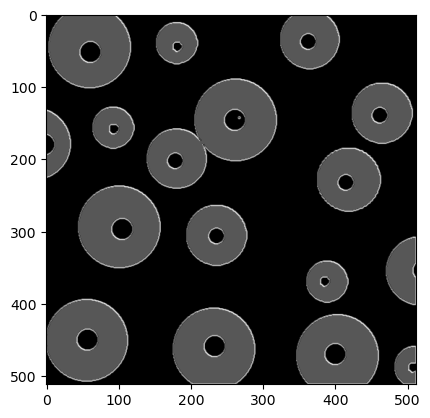

In [ ]:
# edge detection using sobel operator
soble_operator_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, -1]
])

soble_operator_y = np.array([
    [-1, -2, -1],
    [0, 0,  0],
    [1, 2, 1]
])
padded_image = pad_image(img, 1)
gausan = edge_detection(img, soble_operator_x, soble_operator_y, padded_image)

plt.imshow(gausan, cmap='gray')

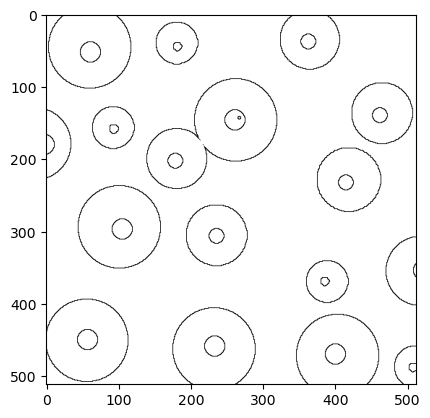

In [40]:
# adaptive mean filter

def adaptive_mean_thresold(img, padded_image, block_size, sigma):

    pad = block_size // 2
    h, w = img.shape

    adMF = np.zeros_like(img, np.float64)
    
    for i in range(h):
        for j in range(w):
            window = padded_image[i : i + block_size, j : j + block_size]
            mean = np.mean(window)
            thresold = mean - sigma
            adMF[i, j] = 255 if img[i, j] > thresold else 0
    
    return adMF.astype(np.float64)
    
    

plt.imshow(adaptive_mean_thresold(img, padded_image, 3, 2), cmap='gray')



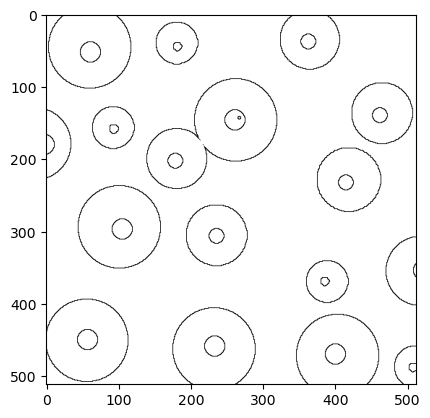

In [41]:
# adaptive gaussian thresolding

def adaptive_gaussian_thresold(img, padded_image, block_size, sigma):

    pad = block_size // 2
    h, w = img.shape

    x = np.linspace(-pad, pad, block_size)
    y = np.linspace(-pad, pad, block_size)
    x, y = np.meshgrid(x, y)

    G = np.exp(-(x ** 2 + y ** 2) / (2 * sigma **2))
    G /= np.sum(G)

    adMF = np.zeros_like(img, np.float64)
    
    for i in range(h):
        for j in range(w):
            window = padded_image[i : i + block_size, j : j + block_size]
            weighted_sum = np.sum(window * G)
            thresold = weighted_sum - sigma
            adMF[i, j] = 255 if img[i, j] > thresold else 0
    
    return adMF.astype(np.float64)

plt.imshow(adaptive_gaussian_thresold(img, padded_image, 3, 2), cmap='gray')

